# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import patsy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
# Verificando o 'tipo_renda' dos valores missing para a variável 'tempo_emprego'
df[df['tempo_emprego'].isna() == True]['tipo_renda'].value_counts()

tipo_renda
Pensionista    2573
Name: count, dtype: int64

In [5]:
# Preenchendo com '0' os valores missing pois os mesmos são pensionistas
df['tempo_emprego'].fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
# Excluindo as variáveis que não serão utilizadas na Patsy
df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1, inplace = True)
# Tratando os valores do tipo 'bool'
df.posse_de_veiculo = [int(x) for x in df.posse_de_veiculo]
df.posse_de_imovel = [int(x) for x in df.posse_de_imovel]
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [7]:
X = df.drop("renda",axis = 1)
y = df["renda"]

In [8]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
df_test = pd.concat([X_test, y_test], axis = 1)

In [10]:
# Rodando uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_test)
for alpha in alphas:
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0001
                         , alpha = alpha)

    
    print('Para Alpha =',alpha,', o R-quared é igual a',reg.rsquared)

Para Alpha = 0 , o R-quared é igual a 0.35889918923068354
Para Alpha = 0.001 , o R-quared é igual a 0.35889918923068354
Para Alpha = 0.005 , o R-quared é igual a 0.35889918923068354
Para Alpha = 0.01 , o R-quared é igual a 0.35889918923068354
Para Alpha = 0.05 , o R-quared é igual a 0.35888134403978766
Para Alpha = 0.1 , o R-quared é igual a 0.35888134403978766





**Avaliando os $R^2$:**
* Os valores dos $R^2$ são praticamente idênticos para todos os modelos.

In [11]:
# Rodando uma regularização lasso com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
for alpha in alphas:
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = alpha)

    
    print('Para Alpha =',alpha,', o R-quared é igual a',reg.rsquared)

Para Alpha = 0 , o R-quared é igual a 0.35889918923068354
Para Alpha = 0.001 , o R-quared é igual a 0.3530443655997536
Para Alpha = 0.005 , o R-quared é igual a 0.34781842223749926
Para Alpha = 0.01 , o R-quared é igual a 0.3470467997831277
Para Alpha = 0.05 , o R-quared é igual a 0.34007335858496857
Para Alpha = 0.1 , o R-quared é igual a 0.34007335858496857


**Avaliando os $R^2$:**
* O modelo que apresenta o melhor $R^2$ é aquele com **Alpha igual a zero**.

In [12]:
y_test, X_test = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))', data = df_test, return_type="dataframe")

In [13]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [14]:
variaveis = stepwise_selection(X_test, y_test)

print('resulting features:')
print(variaveis)

Add  Intercept                      with p-value 0.0
#############
['Intercept']
Add  tempo_emprego                  with p-value 1.92779e-154
#############
['Intercept', 'tempo_emprego']
Add  sexo[T.M]                      with p-value 9.99428e-171
#############
['Intercept', 'tempo_emprego', 'sexo[T.M]']
Add  tipo_renda[T.Pensionista]      with p-value 6.78914e-20
#############
['Intercept', 'tempo_emprego', 'sexo[T.M]', 'tipo_renda[T.Pensionista]']
Add  posse_de_imovel                with p-value 3.96702e-06
#############
['Intercept', 'tempo_emprego', 'sexo[T.M]', 'tipo_renda[T.Pensionista]', 'posse_de_imovel']
Add  educacao[T.Superior completo]  with p-value 2.11236e-05
#############
['Intercept', 'tempo_emprego', 'sexo[T.M]', 'tipo_renda[T.Pensionista]', 'posse_de_imovel', 'educacao[T.Superior completo]']
Add  idade                          with p-value 3.00604e-05
#############
['Intercept', 'tempo_emprego', 'sexo[T.M]', 'tipo_renda[T.Pensionista]', 'posse_de_imovel', 'educacao[

In [15]:
X_stepwise = X_test[['Intercept', 'tempo_emprego', 'sexo[T.M]', 'tipo_renda[T.Pensionista]', 'posse_de_imovel', 'educacao[T.Superior completo]', 'idade', 'tipo_renda[T.Empresário]', 'C(qtd_filhos)[T.2]', 'estado_civil[T.União]']]
reg = sm.OLS(y_test, X_stepwise).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:19:40   Log-Likelihood:                -4020.0
No. Observations:                3750   AIC:                             8060.
Df Residuals:                    3740   BIC:                             8122.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.1051      0.064    111.716      0.000       6.980       7.230
tempo_emprego                     0.0631      0.002     30.884      0.000       0.059       0.067
sexo[T.M]                         0.8062      0.026     31.605      0.000       0.756       0.856
tipo_renda[T.Pensionista]         0.2382      0.046      5.139      0.000       0.147       0.329
posse_de_imovel                   0.1035      0.025      4.140      0.000       0.055       0.153
educacao[T.Superior completo]     0.1044      0.024      4.297      0.000       0.057       0.152
idade                             0.0065      0.001      4.532      0.000       0.004       0.009
tipo_renda[T.Empresário]          0.1172      0.029      4.092      0.000       0.061       0.173
C(qtd_filhos)[T.2]                0.1076      0.040      2.666      0.008       0.028       0.187
estado_civil[T.União]            -0.0970      0.045     -2.178      0.029      -0.184      -0.010
==============================================================================
Omnibus:                        5.482   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                6.198
Skew:                          -0.015   Prob(JB):                       0.0451
Kurtosis:                       3.197   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Avaliando os $R^2$:**
* O modelo com o stepwise não apresentou valores melhores para o $R^2$.
* Tanta o ridge, para os quatro primeiros alphas, quanto o lasso, para o primeiro alpha, apresentaram valores melhores para o $R^2$.

In [16]:
# Rodando uma regularização ridge com alpha = 0, tendo em vista que apresenta os mesmos valores para outros 03 (três)
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0001
                         , alpha = 0)

    
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     61.18
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:19:50   Log-Likelihood:                -4009.2
No. Observations:                3750   AIC:                             8088.
Df Residuals:                    3716   BIC:                             8306.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [17]:
# Rodando uma regularização lasso com alpha = 0
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

    
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     61.18
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:20:00   Log-Likelihood:                -4009.2
No. Observations:                3750   AIC:                             8088.
Df Residuals:                    3716   BIC:                             8306.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [18]:
# Removendo as variáveis menos significantes
df_ajustado = df[(df.qtd_filhos < 2)&(df.qt_pessoas_residencia < 4)&(df.tipo_renda != 'Bolsista')&(df.tipo_renda != 'Servidor público')]
df_ajustado = df_ajustado.drop(['educacao', 'tipo_residencia', 'posse_de_veiculo'], axis = 1)
df_ajustado.head()

,sexo,posse_de_imovel,qtd_filhos,tipo_renda,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,1,0,Empresário,Solteiro,26,6.602740,1.0,8060.34
1,M,1,0,Assalariado,Casado,28,7.183562,2.0,1852.15
2,F,1,0,Empresário,Casado,35,0.838356,2.0,2253.89
4,M,0,0,Assalariado,Solteiro,33,4.293151,1.0,6475.97
5,F,1,0,Assalariado,Casado,39,4.345205,2.0,1445.87


In [19]:
# Rodando uma regularização ridge com alpha = 0 para o ajuste
modelo = 'np.log(renda) ~ sexo + posse_de_imovel + C(qtd_filhos) + tipo_renda + estado_civil + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_ajustado)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0001
                         , alpha = 0)

    
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     434.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:20:16   Log-Likelihood:                -13256.
No. Observations:               12318   AIC:                         2.654e+04
Df Residuals:                   12304   BIC:                         2.665e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Avaliando os $R^2$:**
* O modelo ajustado, após a retirada das variáveis pouco significantes, apresentou $R^2$ pior; e
* Algumas variáveis também tiveram seus **P-Value alterados para valores acima de 0.05**.

In [20]:
# Criando as variáveis dummies para as variáveis qualitativas
df_dummies = patsy.dmatrix('sexo + posse_de_veiculo + posse_de_imovel + C(qtd_filhos) + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))', df, return_type = 'dataframe')
df_dummies.drop('Intercept', axis = 1, inplace = True)
df_dummies.head()

,sexo[T.M],C(qtd_filhos)[T.1],C(qtd_filhos)[T.2],C(qtd_filhos)[T.3],C(qtd_filhos)[T.4],C(qtd_filhos)[T.5],C(qtd_filhos)[T.7],C(qtd_filhos)[T.14],tipo_renda[T.Bolsista],tipo_renda[T.Empresário],...,"C(qt_pessoas_residencia, Treatment(2))[T.4.0]","C(qt_pessoas_residencia, Treatment(2))[T.5.0]","C(qt_pessoas_residencia, Treatment(2))[T.6.0]","C(qt_pessoas_residencia, Treatment(2))[T.7.0]","C(qt_pessoas_residencia, Treatment(2))[T.9.0]","C(qt_pessoas_residencia, Treatment(2))[T.15.0]",posse_de_veiculo,posse_de_imovel,idade,tempo_emprego
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,6.602740
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,7.183562
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,35.0,0.838356
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,4.846575
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0,4.293151


In [21]:
X = df_dummies
y = df["renda"]

In [22]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Ajustar uma árvore de regressão para cada valor alpha
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
# Inicializar listas para armazenar os MSEs
mse_values = []
for alpha in alphas:
    # Criar e ajustar a árvore de regressão com regularização Ridge
    reg2 = DecisionTreeRegressor(max_depth=5, ccp_alpha=alpha)
    reg2.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = reg2.predict(X_test)
    
    # Calcular o MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

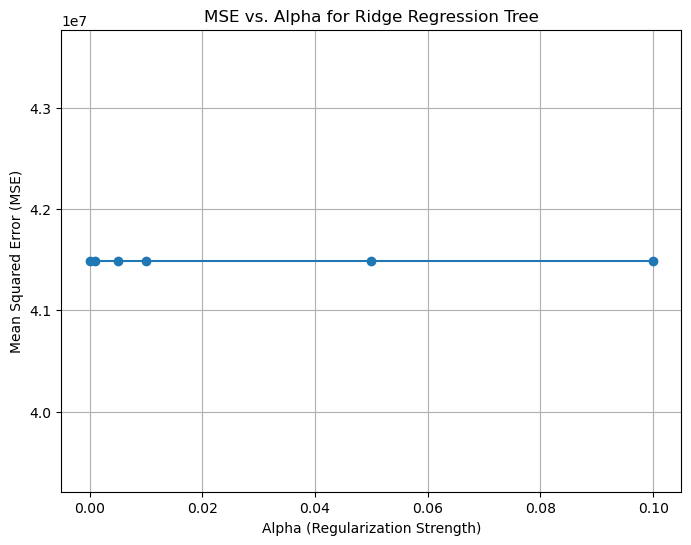

In [24]:
# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_values, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Ridge Regression Tree')
plt.grid(True)
plt.show()

In [25]:
# Escolher o valor de alpha com o menor MSE
best_alpha = alphas[np.argmin(mse_values)]
print(f"Melhor valor de alpha: {best_alpha}")

Melhor valor de alpha: 0


In [26]:
# Criar e ajustar a árvore de regressão com o melhor alpha
reg2 = DecisionTreeRegressor(max_depth=5, ccp_alpha=best_alpha)
reg2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=5)

In [27]:
# Calcular o R-quadrado
r2 = reg2.score(X_test, y_test)
mse = mean_squared_error(y_test, reg2.predict(X_test))
print(r2)
print(mse)

0.3840501216258456
41489565.5737626


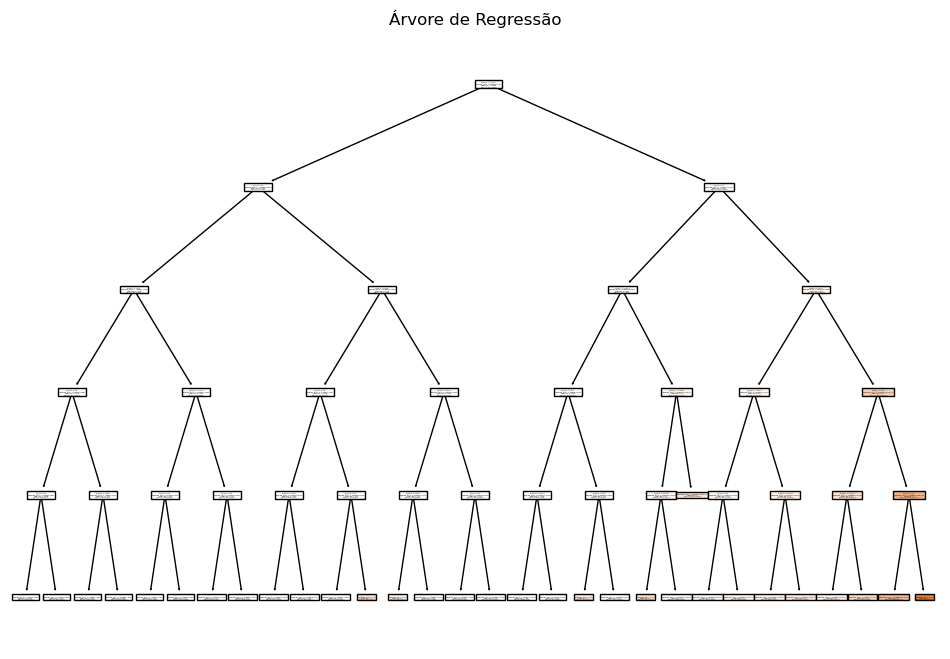

In [28]:
# Plotar a árvore
plt.figure(figsize=(12, 8))
tree.plot_tree(reg2, filled=True)
plt.title('Árvore de Regressão')
plt.show()

**Avaliando os $R^2$:**
* A árvore de regressão apresentou um $R^2$ um pouco melhor.